# Tugas 04 - Naive Bayes & Bayessian Network

Nama : Muh.Ikhsan

NIM  : H071191049

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split

Dataset Heart Disease UCI

source : https://www.kaggle.com/ronitf/heart-disease-uci

Keterangan variabel :
- age: umur (tahun)
- sex: jenis kelamin (1 = laki-laki; 0 = perempuan)
- cp: tipe nyeri dada
- trestbps: tekanan darah istirahat (dalam mm Hg saat masuk ke rumah sakit)
- kol: kolestoral dalam mg / dl
- fbs : gula darah puasa> 120 mg / dl → (1 = benar; 0 = salah)
- restecg: hasil elektrokardiografi istirahat (0,1,2)
- thalach: detak jantung maksimum
- exang: angina yang diinduksi olahraga (1 = ya; 0 = tidak)
- oldpeak: ST depresi yang disebabkan oleh olahraga relatif terhadap istirahat
- slope: kemiringan segmen ST latihan puncak
- ca: jumlah pembuluh darah utama (0–3) diwarnai dengan fluoroskopi
- thal: 3 = biasa; 6 = cacat tetap; 7 = cacat reversibel
- target: memiliki penyakit atau tidak (1 = ya, 0 = tidak)

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Melihat dimensi

In [4]:
df.shape

(303, 14)

Melihat info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Mekihat dari data berapa pasien yang mengidap penyakit jantung

In [6]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Contoh Visualisasi pasien pengidap penyakti jantung berdasarkan jenis kelamin

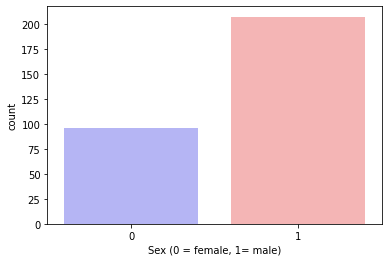

In [7]:
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Menentukan variabel independen

In [9]:
x = df.drop(["target"], axis = 1)
y = df.target

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)

len(x_test), len(x_train)

(61, 242)

## Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0])

Melihat nilai sebenarnya sebelum diprediksi

In [11]:
y_actual = np.array(y_test)
y_actual

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1])

Melihat berapa probabilitas hasil prediksi data testing

In [12]:
gnb.predict_proba(x_test)

array([[5.82571613e-04, 9.99417428e-01],
       [9.99240610e-01, 7.59390366e-04],
       [9.99938869e-01, 6.11309321e-05],
       [9.99992658e-01, 7.34177465e-06],
       [3.63366729e-03, 9.96366333e-01],
       [9.99951069e-01, 4.89308903e-05],
       [8.58720034e-03, 9.91412800e-01],
       [5.98819913e-01, 4.01180087e-01],
       [5.96228807e-04, 9.99403771e-01],
       [9.33511439e-01, 6.64885614e-02],
       [9.97942318e-01, 2.05768198e-03],
       [4.57117589e-01, 5.42882411e-01],
       [9.99999986e-01, 1.36224796e-08],
       [9.99995730e-01, 4.26988712e-06],
       [5.16991611e-01, 4.83008389e-01],
       [1.00000000e+00, 5.08353833e-11],
       [9.10174530e-01, 8.98254697e-02],
       [9.86808541e-01, 1.31914589e-02],
       [5.72076923e-01, 4.27923077e-01],
       [2.24348439e-01, 7.75651561e-01],
       [1.35283843e-01, 8.64716157e-01],
       [9.99163302e-01, 8.36698360e-04],
       [4.11827050e-05, 9.99958817e-01],
       [9.82142245e-01, 1.78577552e-02],
       [9.874878

Confussion Matrix

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[27,  7],
       [ 3, 24]])

In [14]:
y_actual = pd.Series(y_actual, name = "actual")
y_pred = pd.Series(y_pred, name = "prediction")
df_confusion = pd.crosstab(y_actual, y_pred)
df_confusion

prediction,0,1
actual,,
0,27,3
1,7,24


Nilai Akurasi

In [15]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8360655737704918


## Bayesian Network

In [16]:
!pip install pybbn
import networkx as nx

from pybbn.graph.dag import Bbn
from pybbn.graph.edge import Edge, EdgeType
from pybbn.graph.jointree import EvidenceBuilder
from pybbn.graph.node import BbnNode
from pybbn.graph.variable import Variable
from pybbn.pptc.inferencecontroller import InferenceController

  Created wheel for pybbn: filename=pybbn-3.2.1-py3-none-any.whl size=39726 sha256=6c630d2155bbc19f324c3fa280da29aa5c898670630cc2bdaf46602d4371436b
  Stored in directory: /root/.cache/pip/wheels/a8/64/55/b52530d41fe7c9ae501ddd7c06f3122ceb5f15921680f0371b
Successfully built pybbn


In [17]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [18]:
df.target.value_counts(normalize=True).sort_index()

0    0.455446
1    0.544554
Name: target, dtype: float64

In [19]:
df[["age","trestbps","chol","thalach"]].describe()

,age,trestbps,chol,thalach
count,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865
std,9.082101,17.538143,51.830751,22.905161
min,29.000000,94.000000,126.000000,71.000000
25%,47.500000,120.000000,211.000000,133.500000
50%,55.000000,130.000000,240.000000,153.000000
75%,61.000000,140.000000,274.500000,166.000000
max,77.000000,200.000000,564.000000,202.000000


Setelah searching saya dapatkan bahwa detak jantung (thalach) juga dipengaruhi oleh usia (age), dan Kolesterol (chol) tinggi dalam darah juga berhubungan dengan tekanan darah tinggi.

Kemudian tekanan darah dan frekuensi detak jantung dapat dijadikan tanda awal serangan jantung

In [20]:
df["ageCat"] = df["age"].apply(lambda x: '0.<=45' if x<=45 else '1.45-60' if 45<x<60 else '2.>60')
df["trestbpsCat"] = df["trestbps"].apply(lambda x: '1.>130' if x>130 else '0.<130')
df["thalachCat"] = df["thalach"].apply(lambda x:'0.<=130' if x<=130 else '1.130-165' if 130<x<165 else '2.>165')
df["cholCat"] = df["chol"].apply(lambda x: '0.<=200' if x<=200 else '1.200-240' if 200<x<240 else '2.>240')

In [21]:
df["ageCat"].value_counts().sort_index()

0.<=45      64
1.45-60    149
2.>60       90
Name: ageCat, dtype: int64

In [22]:
def probs(data, child, parent1=None, parent2=None):
  if parent1==None:
    prob = pd.crosstab(data[child], 'Empty', margins=False, normalize='columns').sort_index().to_numpy().reshape(-1).tolist()
  elif parent1!=None:
    if parent2==None:
      prob=pd.crosstab(data[parent1], data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
    else:
      prob=pd.crosstab([data[parent1], data[parent2]], data[child], margins=False, normalize='index').sort_index().to_numpy().reshape(-1).tolist()
  else: print("Error menghitung frekuensi probabilitas")
  return prob

In [23]:
age = BbnNode(Variable(0, 'age', ['<=45','45-60' '>60']), probs(df, child="ageCat"))
chol = BbnNode(Variable(1, 'chol', ['<=200','200-240' '>240']), probs(df, child="cholCat"))
thalach = BbnNode(Variable(2, 'thalach', ['<=130','130-165' '>165']), probs(df, child="thalachCat", parent1="ageCat"))
trestbps = BbnNode(Variable(3, 'trestbps', ['<=130', '>130']), probs(df, child="trestbpsCat", parent1="cholCat"))
HA = BbnNode(Variable(4, 'HA', ['No', 'Yes']), probs(df, child="target", parent1="thalachCat", parent2="trestbpsCat"))

bbn = Bbn() \
      .add_node(age) \
      .add_node(thalach) \
      .add_node(chol) \
      .add_node(trestbps) \
      .add_node(HA) \
      .add_edge(Edge(age, thalach, EdgeType.DIRECTED)) \
      .add_edge(Edge(thalach, HA, EdgeType.DIRECTED)) \
      .add_edge(Edge(chol, trestbps, EdgeType.DIRECTED)) \
      .add_edge(Edge(trestbps, HA, EdgeType.DIRECTED))

# Convert BBN to Join Tree
join_tree = InferenceController.apply(bbn)

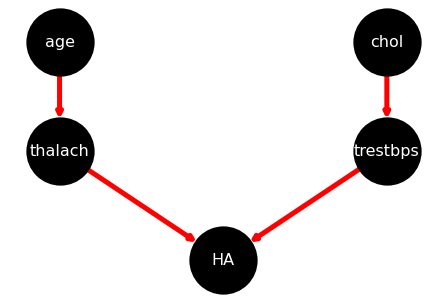

In [24]:
# Set node position
pos = {0: (-1, 2), 1:(1,2), 2:(-1,0.5),3:(1,0.5), 4:(0,-1)}

# Set Options for graph looks
options = {
    "font_size": 16,
    "node_size": 4000, 
    "node_color": "black",
    "edgecolors": "black",
    "edge_color": "red",
    "font_color": "white",
    "linewidths": 5,
    "width": 5}

# Generate Graph
n, d = bbn.to_nx_graph()
nx.draw(n, with_labels=True, labels=d, pos=pos, **options)

# Update margins and print the graph
ax = plt.gca()
ax.margins(0.10)
plt.axis("off")
plt.show()

Plot Probabilitas Heart Attack

In [25]:
def print_probs():
    for node in join_tree.get_bbn_nodes():
        potential = join_tree.get_bbn_potential(node)
        print("Node:", node)
        print("Values:")
        print(potential)
        print('----------------')
        
print_probs()

Node: 2|thalach|<=130,130-165>165
Values:
2=<=130|0.63382
2=130-165>165|0.36618
----------------
Node: 0|age|<=45,45-60>60
Values:
0=<=45|0.17631
0=45-60>60|0.82369
----------------
Node: 3|trestbps|<=130,>130
Values:
3=<=130|0.58108
3=>130|0.41892
----------------
Node: 1|chol|<=200,200-240>240
Values:
1=<=200|0.34459
1=200-240>240|0.65541
----------------
Node: 4|HA|No,Yes
Values:
4=No|0.64323
4=Yes|0.35677
----------------
